In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Load the dataset
data = pd.read_csv("C:/Users/lycia/Downloads/archive/predictive_maintenance.csv")
np.random.seed(0)

# 1. Drop UDI because it is not used and destroys model efficiency -------------------------------------
data.drop(columns=['UDI'], inplace=True)

# 2. Check for Missing Values ----------------------------------------
missing_values = data.isnull().sum()
if missing_values.sum() == 0:
    print("✅ No missing values found.")
else:
    print("⚠️ Missing values detected:\n", missing_values)

# 3. Encode Categorical Features -------------------------------------
label_enc = LabelEncoder()

# Encoding Product ID
data['Product ID'] = label_enc.fit_transform(data['Product ID'])

# Encoding Type and Failure Type
data['Type'] = label_enc.fit_transform(data['Type'])
data['Failure Type'] = label_enc.fit_transform(data['Failure Type'])

# 4. Standardizing Numerical Features -------------------------------
scaler = StandardScaler()

# 5. Final Data Check -----------------------------------------------
print("\n🔍 Final Data Check:")
print(data.info())

# Save cleaned data
data.to_csv("cleaned_data.csv", index=False)
print("\n✅ Cleaned data saved as 'cleaned_data.csv'.")

data

✅ No missing values found.

🔍 Final Data Check:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               10000 non-null  int32  
 1   Type                     10000 non-null  int32  
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   10000 non-null  int64  
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Target                   10000 non-null  int64  
 8   Failure Type             10000 non-null  int32  
dtypes: float64(3), int32(3), int64(3)
memory usage: 586.1 KB
None

✅ Cleaned data saved as 'cleaned_data.csv'.


,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,7003,2,298.1,308.6,1551,42.8,0,0,1
1,1003,1,298.2,308.7,1408,46.3,3,0,1
2,1004,1,298.1,308.5,1498,49.4,5,0,1
3,1005,1,298.2,308.6,1433,39.5,7,0,1
4,1006,1,298.2,308.7,1408,40.0,9,0,1
...,...,...,...,...,...,...,...,...,...
9995,9997,2,298.8,308.4,1604,29.5,14,0,1
9996,1001,0,298.9,308.4,1632,31.8,17,0,1
9997,9998,2,299.0,308.6,1645,33.4,22,0,1
9998,1002,0,299.0,308.7,1408,48.5,25,0,1


C:\Users\lycia\AppData\Local\Temp\ipykernel_24468\1429707287.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  threshold_analysis = df.groupby('Tool wear bin')['Target'].mean().reset_index()
C:\Users\lycia\AppData\Local\Temp\ipykernel_24468\1429707287.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tool Wear Range', y='Failure Rate', data=threshold_analysis, palette="rocket")


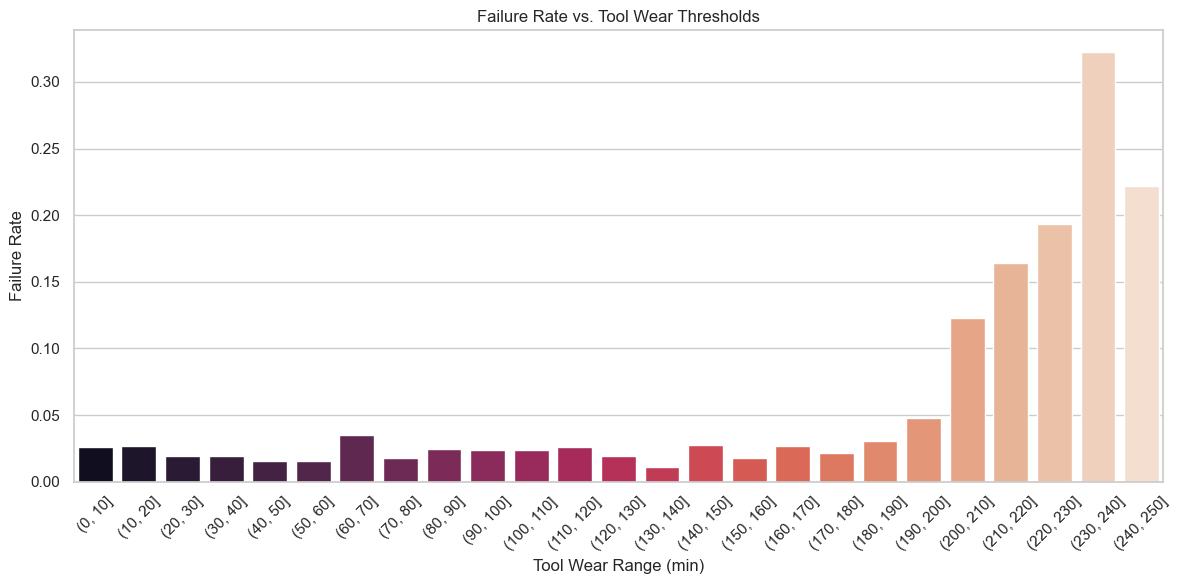

   Tool Wear Range  Failure Rate
0          (0, 10]      0.025882
1         (10, 20]      0.027140
2         (20, 30]      0.019651
3         (30, 40]      0.019608
4         (40, 50]      0.015385
5         (50, 60]      0.015385
6         (60, 70]      0.035011
7         (70, 80]      0.017505
8         (80, 90]      0.024609
9        (90, 100]      0.024176
10      (100, 110]      0.024176
11      (110, 120]      0.025751
12      (120, 130]      0.019608
13      (130, 140]      0.011161
14      (140, 150]      0.027837
15      (150, 160]      0.017778
16      (160, 170]      0.027149
17      (170, 180]      0.021368
18      (180, 190]      0.030769
19      (190, 200]      0.047722
20      (200, 210]      0.122850
21      (210, 220]      0.164444
22      (220, 230]      0.193182
23      (230, 240]      0.322581
24      (240, 250]      0.222222


In [22]:
# Load the cleaned dataset
df = pd.read_csv("dataclean.csv")  # Make sure this path is correct in your notebook

# Step 1: Create bins for tool wear
df['Tool wear bin'] = pd.cut(df['Tool wear [min]'], bins=np.arange(0, 260, 10))

# Step 2: Calculate failure rate per bin
threshold_analysis = df.groupby('Tool wear bin')['Target'].mean().reset_index()
threshold_analysis.columns = ['Tool Wear Range', 'Failure Rate']

# Step 3: Plot failure rate vs. tool wear range
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(x='Tool Wear Range', y='Failure Rate', data=threshold_analysis, palette="rocket")

# Step 4: Final plot adjustments
plt.xticks(rotation=45)
plt.title("Failure Rate vs. Tool Wear Thresholds")
plt.xlabel("Tool Wear Range (min)")
plt.ylabel("Failure Rate")
plt.tight_layout()
plt.show()

# Optional: Display the table of results
print(threshold_analysis)


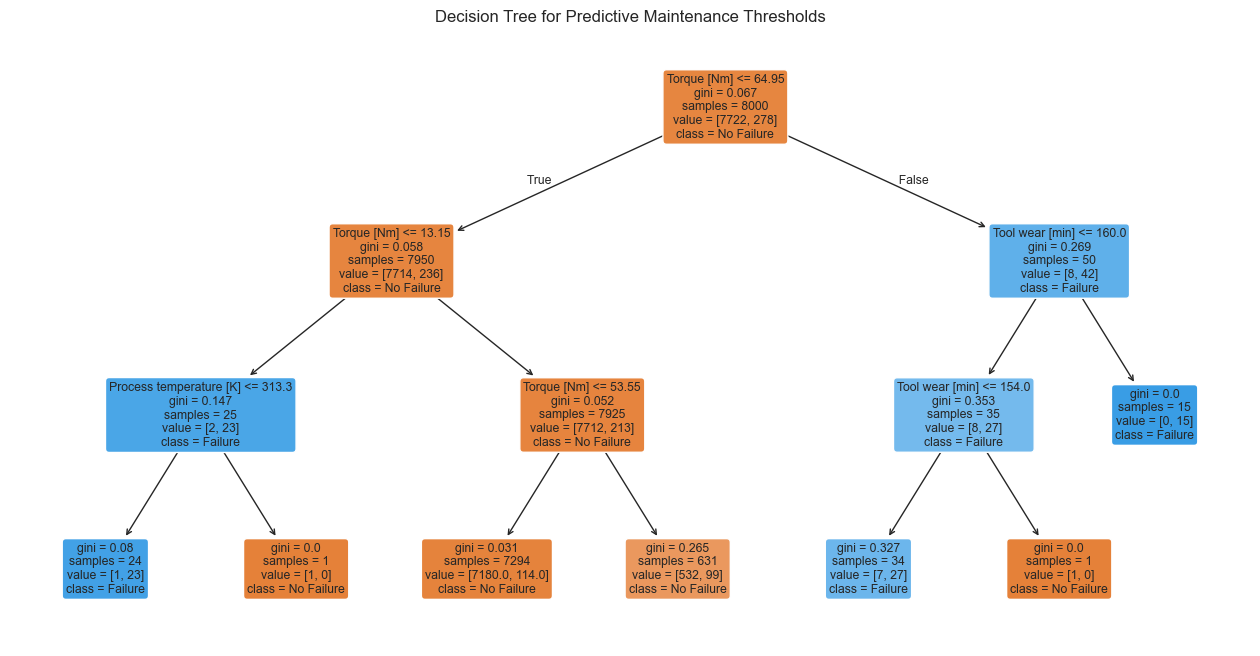

              precision    recall  f1-score   support

  No Failure       0.98      1.00      0.99      1939
     Failure       0.79      0.25      0.38        61

    accuracy                           0.97      2000
   macro avg       0.88      0.62      0.68      2000
weighted avg       0.97      0.97      0.97      2000



In [24]:
# Select key sensor features and target
features = ['Tool wear [min]', 'Torque [Nm]', 'Air temperature [K]', 'Process temperature [K]']
X = df[features]
y = df['Target']

# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

# Step 3: Plot the decision tree
plt.figure(figsize=(16, 8))
plot_tree(tree_model, feature_names=features, class_names=["No Failure", "Failure"],
          filled=True, rounded=True)
plt.title("Decision Tree for Predictive Maintenance Thresholds")
plt.show()

# Step 4: Classification performance
y_pred = tree_model.predict(X_test)
report = classification_report(y_test, y_pred, target_names=["No Failure", "Failure"])
print(report)
